In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv(
    "C:\\Users\\yulda\\Desktop\\ML2 project version for submittion\\default of credit card clients.csv",
    sep=";"
)

In [3]:
df.shape


(30000, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   default payment next month  30000 non-null  int64
 2   PAY_AMT6                    30000 non-null  int64
 3   PAY_AMT5                    30000 non-null  int64
 4   PAY_AMT4                    30000 non-null  int64
 5   PAY_AMT3                    30000 non-null  int64
 6   PAY_AMT2                    30000 non-null  int64
 7   PAY_AMT1                    30000 non-null  int64
 8   BILL_AMT6                   30000 non-null  int64
 9   BILL_AMT5                   30000 non-null  int64
 10  BILL_AMT4                   30000 non-null  int64
 11  BILL_AMT3                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT1                   30000 non-null  int64
 14  PAY_6 

In [5]:
df.head(20)


,ID,default payment next month,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,BILL_AMT6,BILL_AMT5,...,PAY_5,PAY_4,PAY_3,PAY_2,PAY_0,AGE,MARRIAGE,EDUCATION,SEX,LIMIT_BAL
0,1,1,0,0,0,0,689,0,0,0,...,-2,-1,-1,2,2,24,1,2,2,20000
1,2,1,2000,0,1000,1000,1000,0,3261,3455,...,0,0,0,2,-1,26,2,2,2,120000
2,3,0,5000,1000,1000,1000,1500,1518,15549,14948,...,0,0,0,0,0,34,2,2,2,90000
3,4,0,1000,1069,1100,1200,2019,2000,29547,28959,...,0,0,0,0,0,37,1,2,2,50000
4,5,0,679,689,9000,10000,36681,2000,19131,19146,...,0,0,-1,0,-1,57,1,2,1,50000
5,6,0,800,1000,1000,657,1815,2500,20024,19619,...,0,0,0,0,0,37,2,1,1,50000
6,7,0,13770,13750,20239,38000,40000,55000,473944,483003,...,0,0,0,0,0,29,2,1,1,500000
7,8,0,1542,1687,581,0,601,380,567,-159,...,0,0,-1,-1,0,23,2,2,2,100000
8,9,0,1000,1000,1000,432,0,3329,3719,11793,...,0,0,2,0,0,28,1,3,2,140000
9,10,0,0,1122,13007,0,0,0,13912,13007,...,-1,-2,-2,-2,-2,35,2,3,1,20000


In [6]:
df.isna().sum().sort_values(ascending=False)


ID                            0
default payment next month    0
PAY_AMT6                      0
PAY_AMT5                      0
PAY_AMT4                      0
PAY_AMT3                      0
PAY_AMT2                      0
PAY_AMT1                      0
BILL_AMT6                     0
BILL_AMT5                     0
BILL_AMT4                     0
BILL_AMT3                     0
BILL_AMT2                     0
BILL_AMT1                     0
PAY_6                         0
PAY_5                         0
PAY_4                         0
PAY_3                         0
PAY_2                         0
PAY_0                         0
AGE                           0
MARRIAGE                      0
EDUCATION                     0
SEX                           0
LIMIT_BAL                     0
dtype: int64

The variables in the dataset can be grouped into repayment behavior (PAY_*), bill amounts (BILL_AMT*), payment amounts (PAY_AMT*), and demographic or credit profile features. Repayment status variables capture recent payment delays and are expected to be the strongest predictors of default. Bill and payment amount variables describe debt levels and repayment behavior over time, while demographic variables provide contextual information. This grouping helps structure the exploratory analysis and informs model selection and interpretation.

In [7]:
y = df["default payment next month"]

y.value_counts()
y.value_counts(normalize=True)


default payment next month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

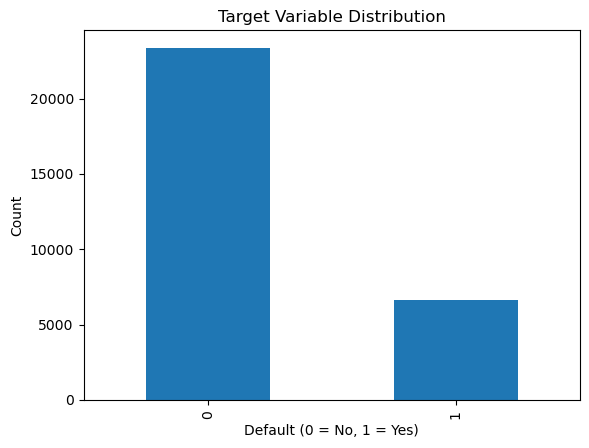

In [8]:
y.value_counts().plot(kind="bar")
plt.title("Target Variable Distribution")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


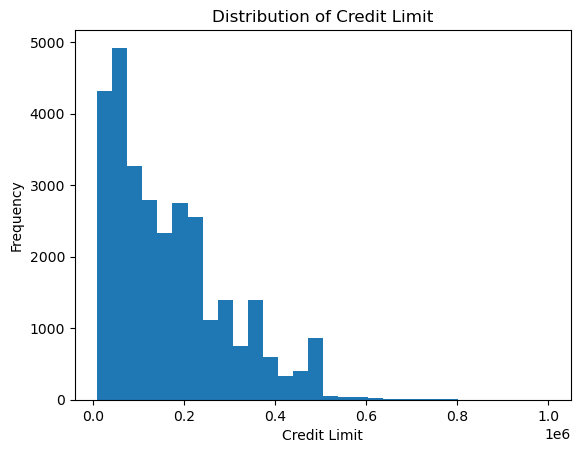

In [9]:
plt.hist(df["LIMIT_BAL"], bins=30)
plt.title("Distribution of Credit Limit")
plt.xlabel("Credit Limit")
plt.ylabel("Frequency")
plt.show()


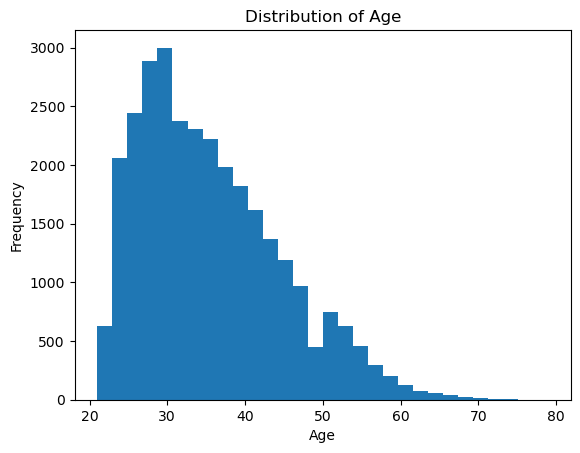

In [10]:
plt.hist(df["AGE"], bins=30)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


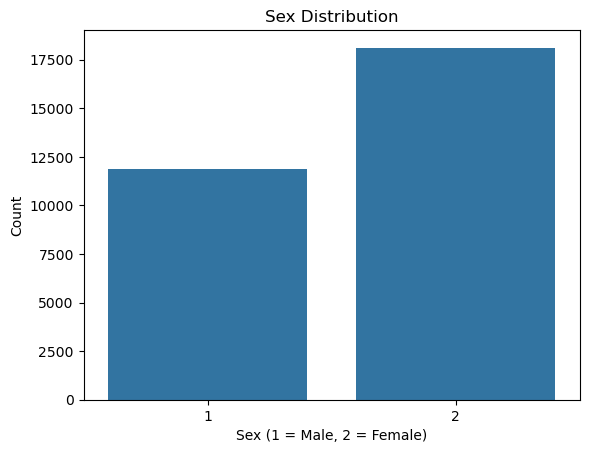

In [11]:
import seaborn as sns

sns.countplot(x="SEX", data=df)
plt.title("Sex Distribution")
plt.xlabel("Sex (1 = Male, 2 = Female)")
plt.ylabel("Count")
plt.show()


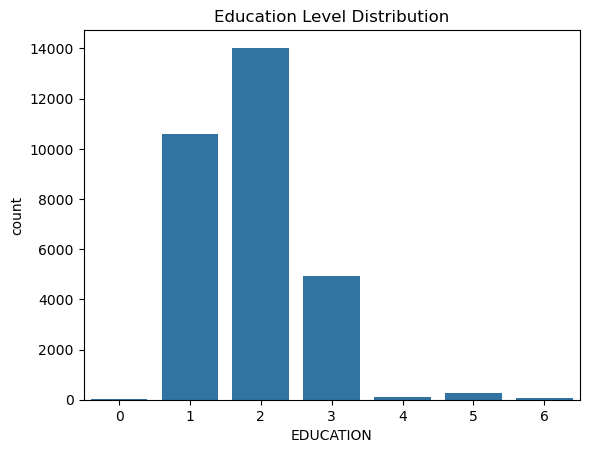

In [12]:
sns.countplot(x="EDUCATION", data=df)
plt.title("Education Level Distribution")
plt.show()


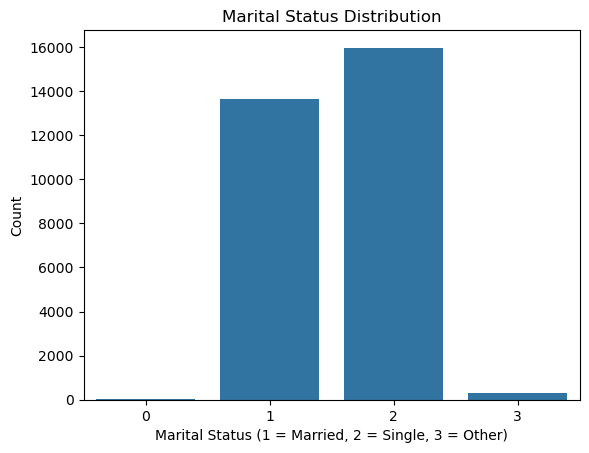

In [13]:
sns.countplot(x="MARRIAGE", data=df)
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status (1 = Married, 2 = Single, 3 = Other)")
plt.ylabel("Count")
plt.show()


In [14]:
df["MARRIAGE"].value_counts()


MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

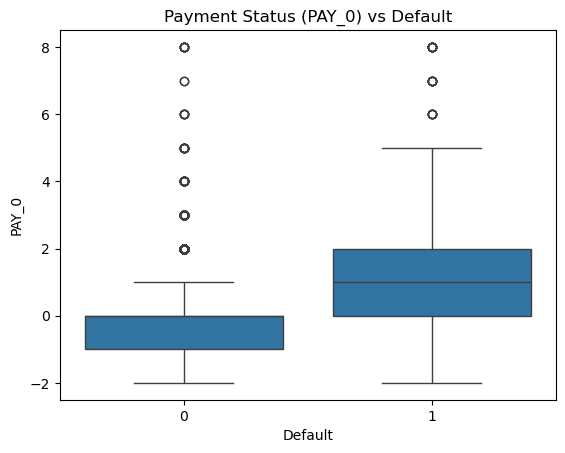

In [15]:
sns.boxplot(x="default payment next month", y="PAY_0", data=df)
plt.title("Payment Status (PAY_0) vs Default")
plt.xlabel("Default")
plt.ylabel("PAY_0")
plt.show()


Clients who default tend to exhibit worse past payment behavior, indicating that repayment history is a strong predictor of default.

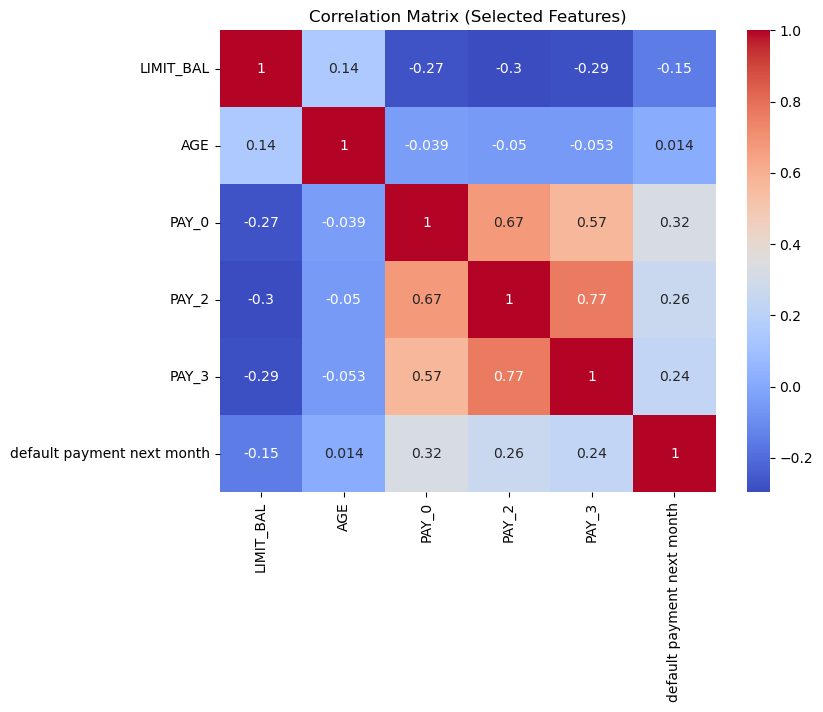

In [16]:
selected_cols = [
    "LIMIT_BAL", "AGE", "PAY_0", "PAY_2", "PAY_3", "default payment next month"
]

plt.figure(figsize=(8, 6))
sns.heatmap(df[selected_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Selected Features)")
plt.show()


Past payment variables show stronger correlation with default than demographic features, suggesting that non-linear and ensemble models may be beneficial.

In [17]:
X = df.drop("default payment next month", axis=1)
y = df["default payment next month"]


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


LOGISTIC REGRESSION

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])


In [20]:
pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)


In [21]:
from sklearn.metrics import classification_report

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000



RANDOM FOREST

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

grid_rf = GridSearchCV(
    rf,
    param_rf,
    scoring="f1",
    cv=3,
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [23]:
y_pred_rf = grid_rf.best_estimator_.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.65      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



In [24]:
grid_rf.best_params_


{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

GRADIENT BOOSTING

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)

param_gb = {
    "n_estimators": [100, 200],
    "learning_rate": [0.03, 0.05, 0.1],
    "max_depth": [3]
}

grid_gb = GridSearchCV(
    gb,
    param_gb,
    scoring="f1",
    cv=3
)

grid_gb.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.03, 0.05, 0.1], 'max_depth': [3],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [26]:
y_pred_gb = grid_gb.best_estimator_.predict(X_test)

print("Gradient Boosting Results:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Results:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [27]:
grid_gb.best_params_


{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}

Model comparison

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred)
    }

results = pd.DataFrame.from_dict({
    "Logistic Regression": evaluate_model(y_test, y_pred_lr),
    "Random Forest": evaluate_model(y_test, y_pred_rf),
    "Gradient Boosting": evaluate_model(y_test, y_pred_gb)
}, orient="index")

results


,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.808000,0.688172,0.241145,0.357143
Random Forest,0.815167,0.651389,0.353429,0.458232
Gradient Boosting,0.819000,0.667594,0.361718,0.469208


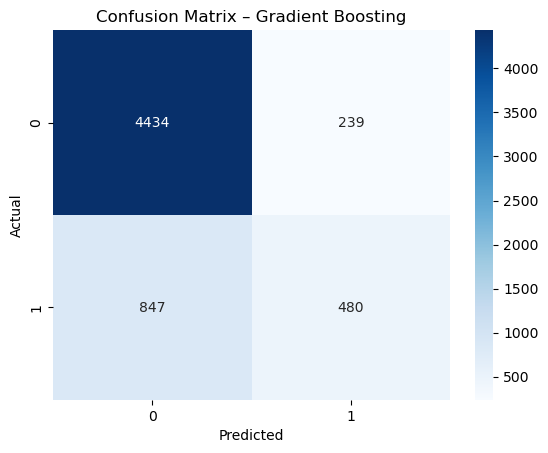

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_gb)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [30]:
best_rf = grid_rf.best_estimator_
best_gb = grid_gb.best_estimator_


In [31]:
# Random Forest predictions
rf_train_pred = best_rf.predict(X_train)
rf_test_pred = best_rf.predict(X_test)

# Gradient Boosting predictions
gb_train_pred = best_gb.predict(X_train)
gb_test_pred = best_gb.predict(X_test)


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred)
    }


In [33]:
# Random Forest
rf_train_metrics = evaluate_model(y_train, rf_train_pred)
rf_test_metrics = evaluate_model(y_test, rf_test_pred)

# Gradient Boosting
gb_train_metrics = evaluate_model(y_train, gb_train_pred)
gb_test_metrics = evaluate_model(y_test, gb_test_pred)

rf_train_metrics, rf_test_metrics, gb_train_metrics, gb_test_metrics


({'Accuracy': 0.931875,
  'Precision': 0.9940828402366864,
  'Recall': 0.6961763043887738,
  'F1-score': 0.8188767032236623},
 {'Accuracy': 0.8151666666666667,
  'Precision': 0.6513888888888889,
  'Recall': 0.35342878673700073,
  'F1-score': 0.4582315583781143},
 {'Accuracy': 0.8278333333333333,
  'Precision': 0.7046956521739131,
  'Recall': 0.3816161235637597,
  'F1-score': 0.4951124144672532},
 {'Accuracy': 0.819,
  'Precision': 0.6675938803894298,
  'Recall': 0.3617181612660136,
  'F1-score': 0.46920821114369504})